# Importation de mes modules 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import missingno as msno
from sklearn import preprocessing
from sklearn import decomposition

%matplotlib inline 

# Telechargement de mon dataframe

In [2]:
data=pd.read_csv('BaseAliments.csv',index_col=0)
#téléchargement de notre base de travail

C:\Users\soule\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.tail(5)

,code,creator,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,...,Energiekcal,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutritionscore100g
542260,9999991149090,kiliweb,Riz parfumé,NaN,NaN,NaN,NaN,King Elephant,king-elephant,"Aliments et boissons à base de végétaux, Alime...",...,351.0,0.5,0.0,80.0,0.0,1.11,7.00,0.000000,0.000000,0.0
542261,9999992756068,kiliweb,Steak haché,NaN,500 g,NaN,NaN,NaN,NaN,"Viandes, Bœuf, Steaks, Steaks de bœuf, Steaks ...",...,238.0,7.9,2.0,11.3,2.8,1.11,6.73,0.629994,0.252001,7.0
542262,99999988,teolemon,Boules,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,372.0,11.0,1.3,58.0,54.0,1.11,6.30,0.020000,0.008000,7.0
542263,9999999004360,kiliweb,Minis beignets,Beignets natures sucrés,NaN,NaN,NaN,NaN,NaN,"Snacks, Snacks sucrés, Beignets sucrés",...,333.0,20.2,6.0,30.9,10.4,1.11,7.40,1.100000,0.440000,15.0
542264,99999995,kiliweb,Steak haché pur boeuf,NaN,NaN,NaN,NaN,NaN,NaN,"Viandes, Bœuf, Steaks, Steaks de bœuf, Steaks ...",...,131.0,5.0,2.3,0.0,0.0,1.11,21.50,0.180000,0.072000,-2.0


In [4]:
data.shape #taille de notre data frame 

(542265, 50)

# Fonctions utilisés 

In [5]:
#fonction qui permet de tracer les histogrammes et les boxplots
def TraceGraphique(Base,colonne):
  plt.figure(figsize=(20,10))
  sns.boxplot(data=Base.sort_values([colonne]),x=colonne);
  plt.title('Dispersion de la variable {}'.format(colonne));
  sns.displot(data=Base.sort_values([colonne]),x=colonne,bins=20,kde=True);
  plt.title('Dispersion de la variable {}'.format(colonne));

In [6]:
#fonction qui trace le graphique des eboulis des valeurs propres
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [7]:
#fonction qui trace les cercle de corrélations
#
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)
            plt.axis('square')

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [8]:
#fonction qui trace le graphique des individus selon
#les plans factoriels 
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [9]:
#fonction qui calcule le eta squared
#de notre anova 
def anova_table():
    aov_table = sm.stats.anova_lm(model, typ=2)
    aov_table['mean_sq'] = aov_table[:]['sum_sq']/aov_table[:]['df']
    #meansq moyenne
    #eta squared rapport de correlation 0pas de rellation entre les variables
    #1 relation entre les variables
    #omega squared meilleure mesure de la taille de l'effet car
    # il est sans biais dans son calcul en tenant compte les degrés de liberté dans le modèle. 
    aov_table['eta_sq'] = aov_table[:-1]['sum_sq']/sum(aov_table['sum_sq'])
    aov_table['omega_sq'] = (aov_table[:-1]['sum_sq']-(aov_table[:-1]['df']*aov_table['mean_sq'][-1]))/(sum(aov_table['sum_sq'])+aov_table['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq','omega_sq']
    aov_table = aov_table[cols]
    return aov_table

In [10]:

#fonction qui affiche le tableau des statistique univariées de chaque colonne 
#et le met dans un fichier image 
def TableauStat(col):
    import matplotlib.pyplot as plt
    from pandas.plotting import table
    desc = data_pca[col].describe()
    #create a subplot without frame
    plot = plt.subplot(111,frame_on=False)
    #remove axis
    plot.xaxis.set_visible(False) 
    plot.yaxis.set_visible(False) 
#create the table plot and position it in the upper left corner
    table( plot, desc,loc='upper right')
#save the plot as a png file
    plt.savefig('desc_plot.png')

In [11]:

#fonction qui affiche le tableau des statistique univariée d'une colonne
#categorielle
def TableauModalite(col):
    import matplotlib.pyplot as plt
    from pandas.plotting import table
    desc = data[col].describe(include='O')
    #create a subplot without frame
    plot = plt.subplot(111,frame_on=False)
    #remove axis
    plot.xaxis.set_visible(False) 
    plot.yaxis.set_visible(False) 
#create the table plot and position it in the upper left corner
    table( plot, desc,loc='upper right')
#save the plot as a png file
    plt.savefig('desc_plot.png')


# Choix de mes variables quantitatives

In [12]:
#choix de mes variables pour notre acp on choisit 11 variables 
data_pca=data[['additives_n','nova_group','saturated-fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','fat_100g','sodium_100g','Energiekcal','sugars_100g','nutritionscore100g']]
#on renomme ces variables pour une meilleure lecture dans notre cercle de corrélation 
data_pca=data_pca.rename(columns={'nova_group':'nova','saturated-fat_100g':'saturated','carbohydrates_100g':'glucides','nutritionscore100g':'score','sugars_100g':'sugars','sodium_100g':'sodium','proteins_100g':'proteins','fiber_100g':'fiber','fat_100g':'fat','additives_n':'additives'})

In [5]:
data_pca.shape

(542265, 11)

# Statistiques univariées

In [13]:
df=data_pca.describe()
#statistiques univariée 
data_pca.columns
df

,additives,nova,saturated,glucides,fiber,proteins,fat,sodium,Energiekcal,sugars,score
count,542265.000000,542265.000000,542265.000000,542265.000000,542265.000000,542265.000000,542265.000000,542265.000000,542265.000000,542265.000000,542265.000000
mean,0.316246,3.839542,4.466259,20.735133,1.205321,8.655283,11.950818,0.339165,252.313548,8.585443,7.518874
std,1.018039,0.570814,6.027521,22.831249,0.832546,7.589040,12.745760,0.370662,152.791403,13.426439,5.205214
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004187,0.000000,-15.000000
25%,0.000000,4.000000,0.500000,3.800000,1.110000,3.300000,2.200000,0.052000,141.000000,1.000000,7.000000
50%,0.000000,4.000000,2.000000,11.300000,1.110000,6.730000,7.900000,0.252001,238.000000,2.800000,7.000000
75%,0.000000,4.000000,5.400000,31.800000,1.110000,12.000000,17.800000,0.440000,347.000000,9.300000,7.000000
max,8.000000,4.000000,30.300000,100.000000,11.200000,47.700000,84.000000,2.132000,1220.000000,59.000000,40.000000


# Graphiques

## Variables Numeriques 

<ipython-input-5-ba5ddc56add1>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


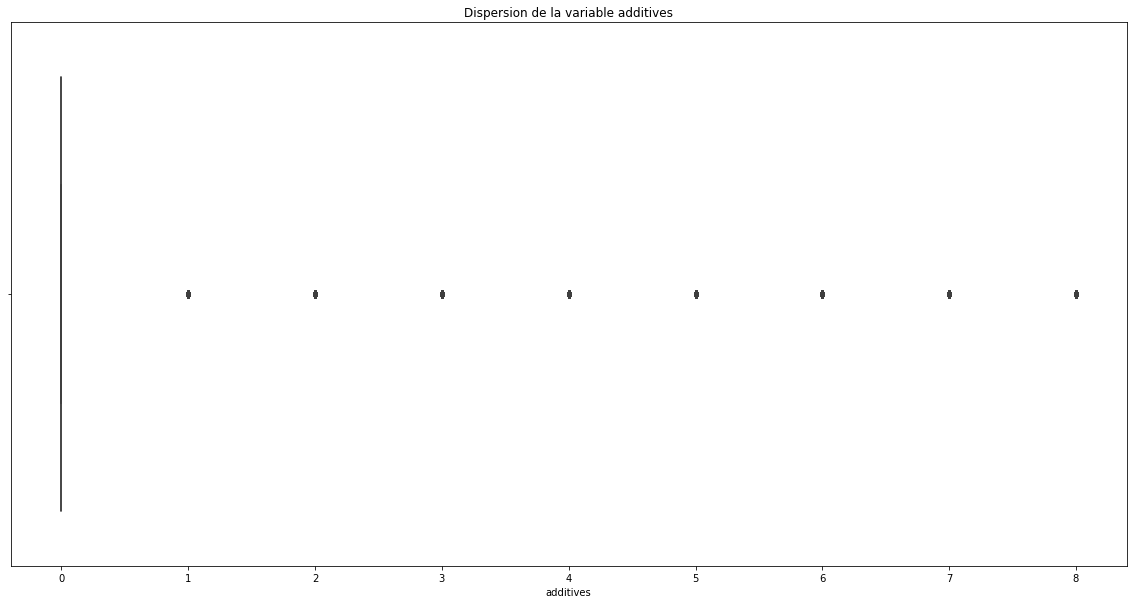

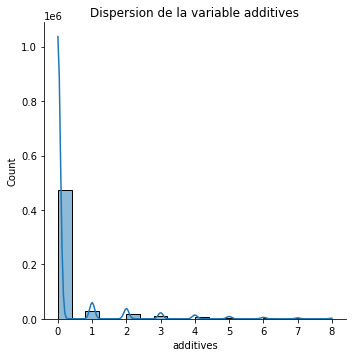

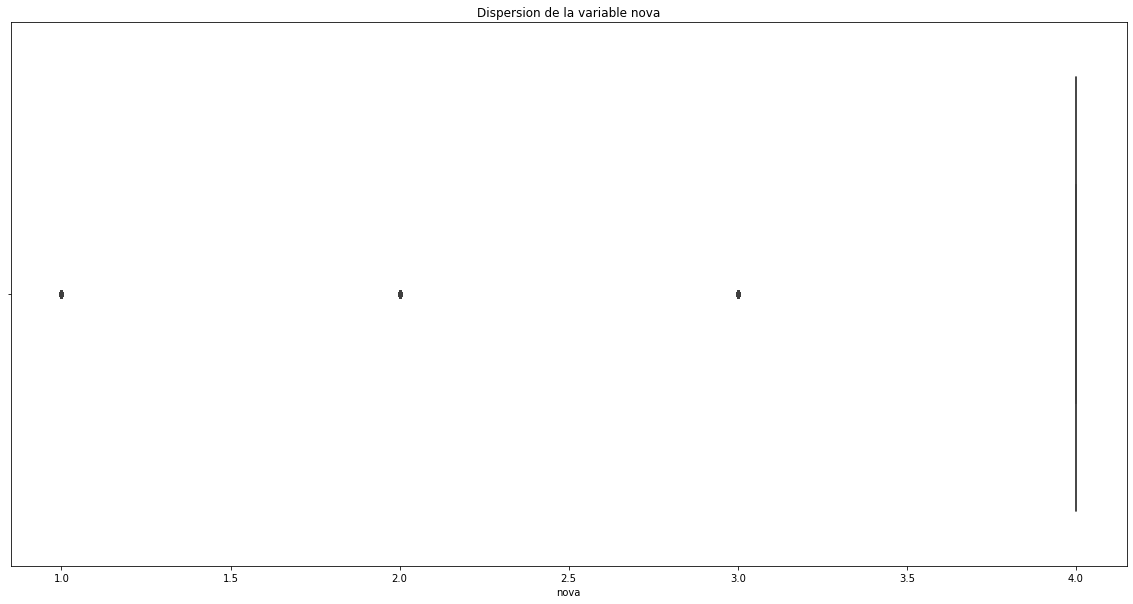

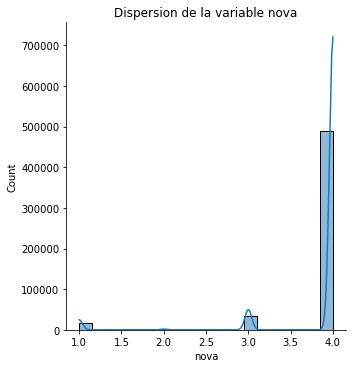

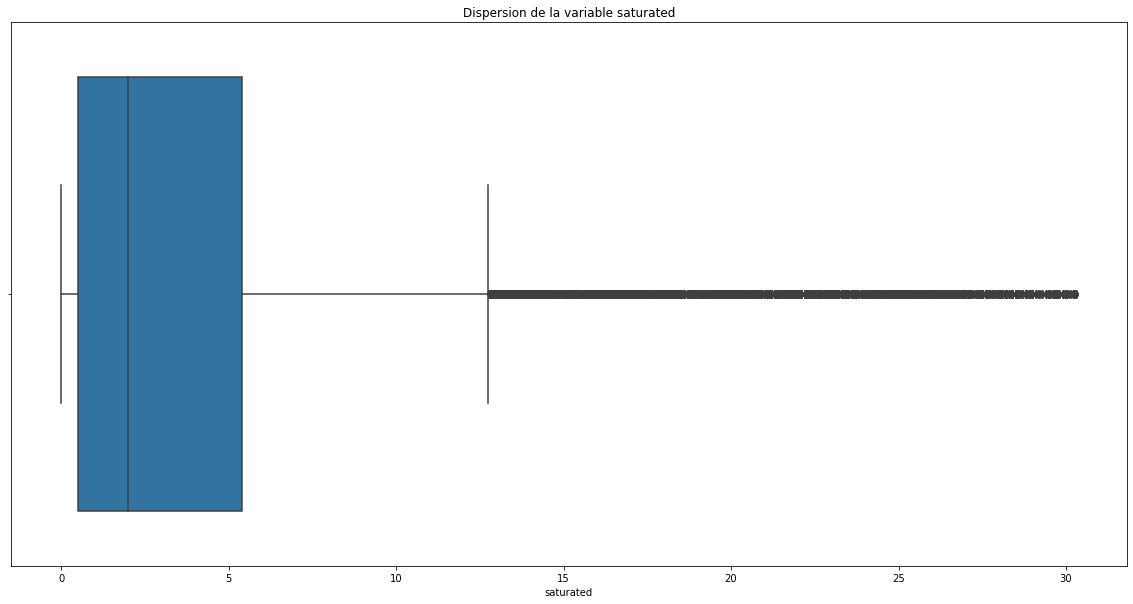

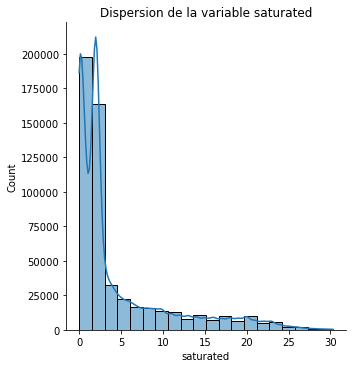

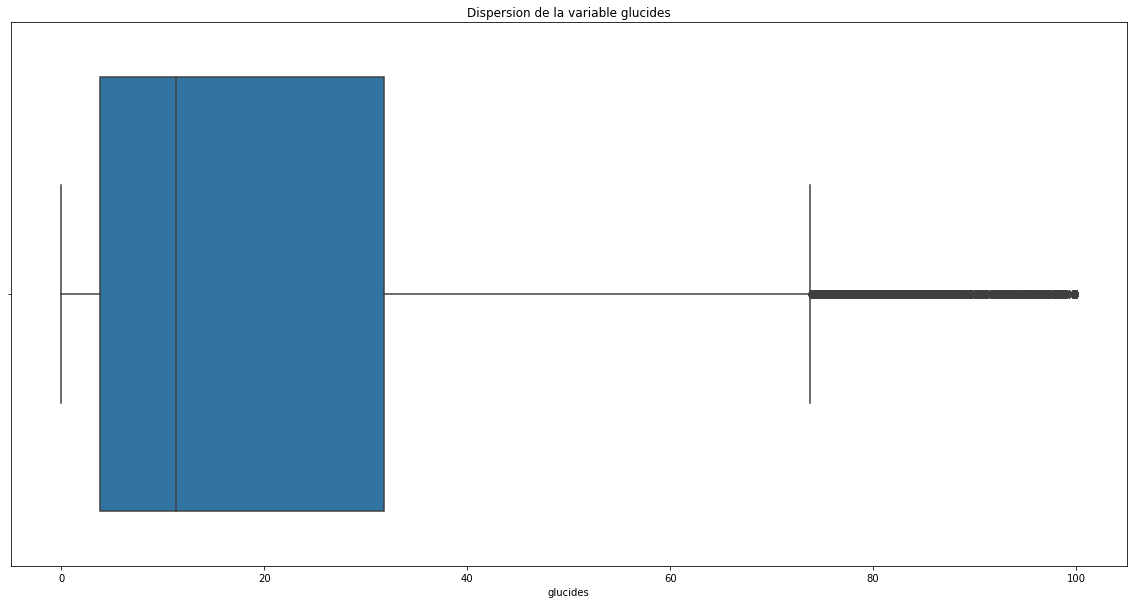

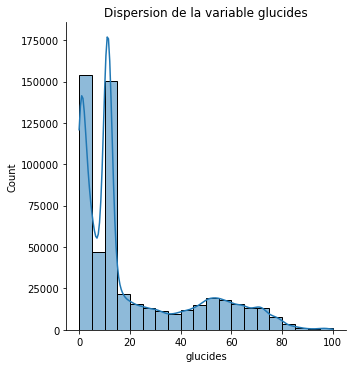

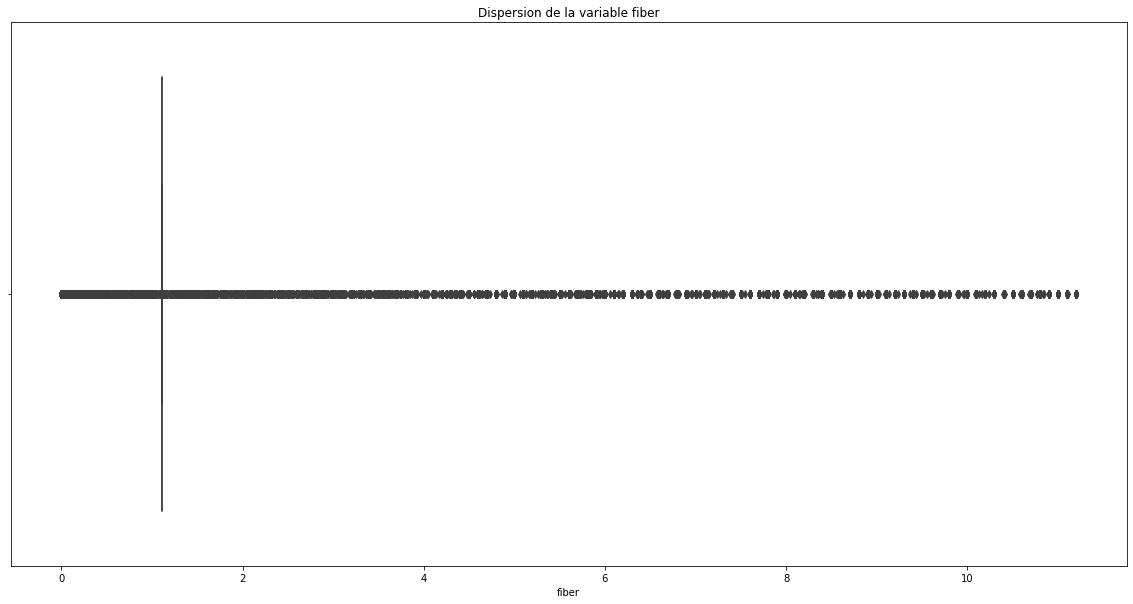

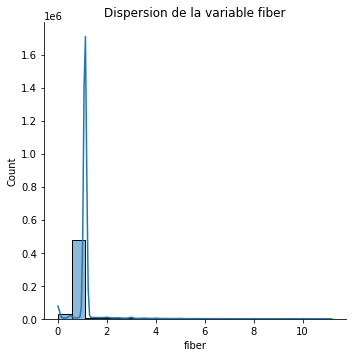

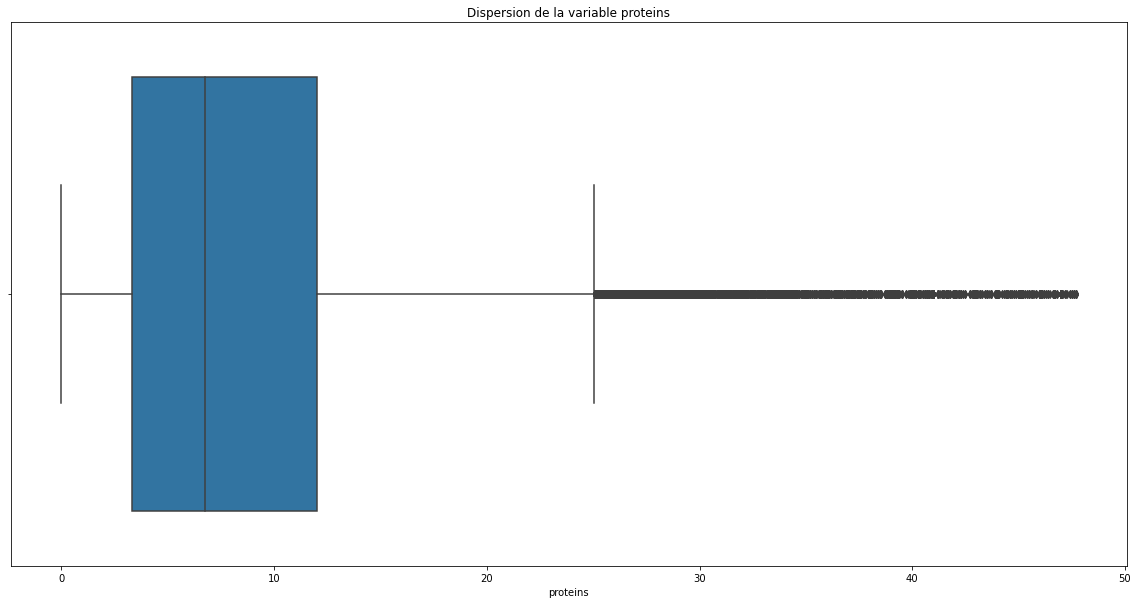

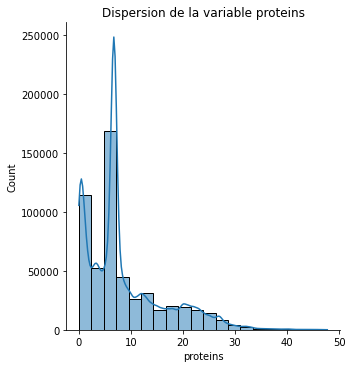

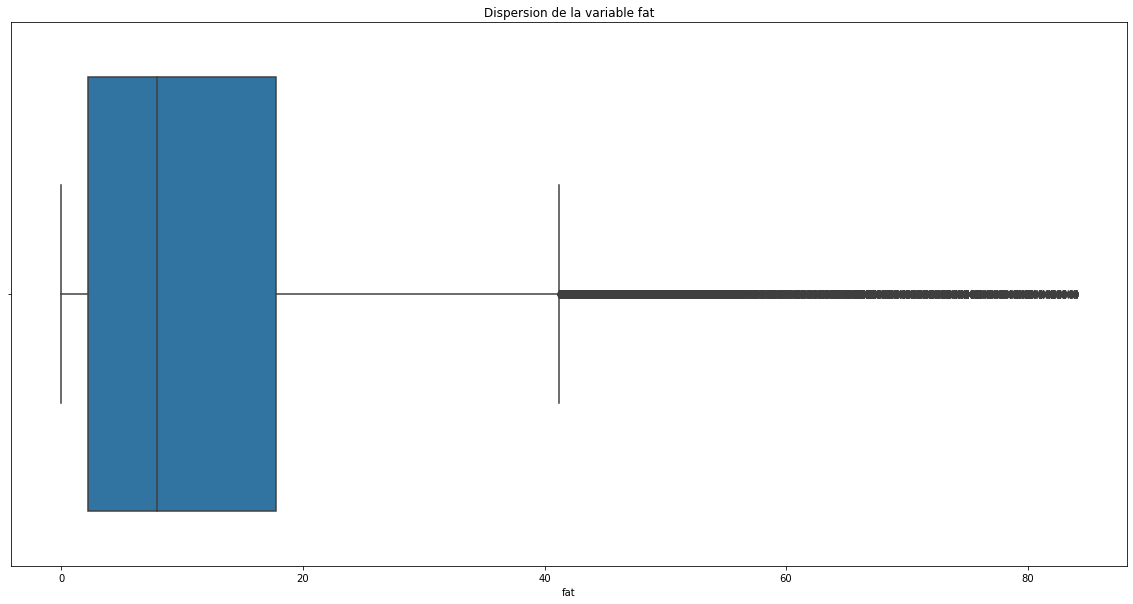

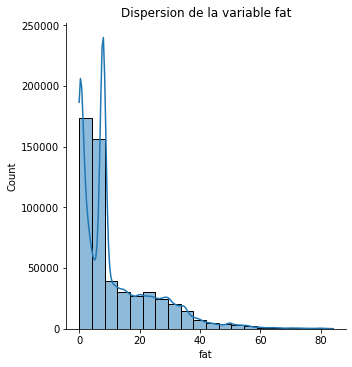

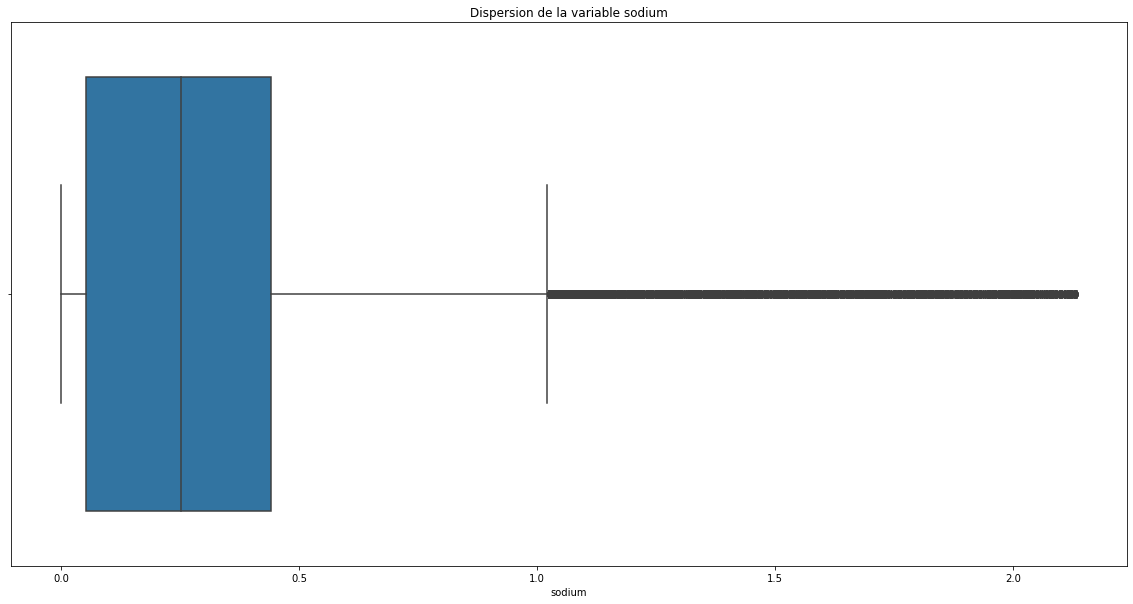

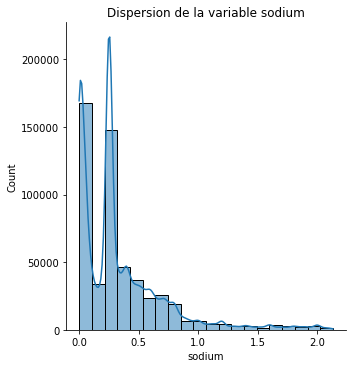

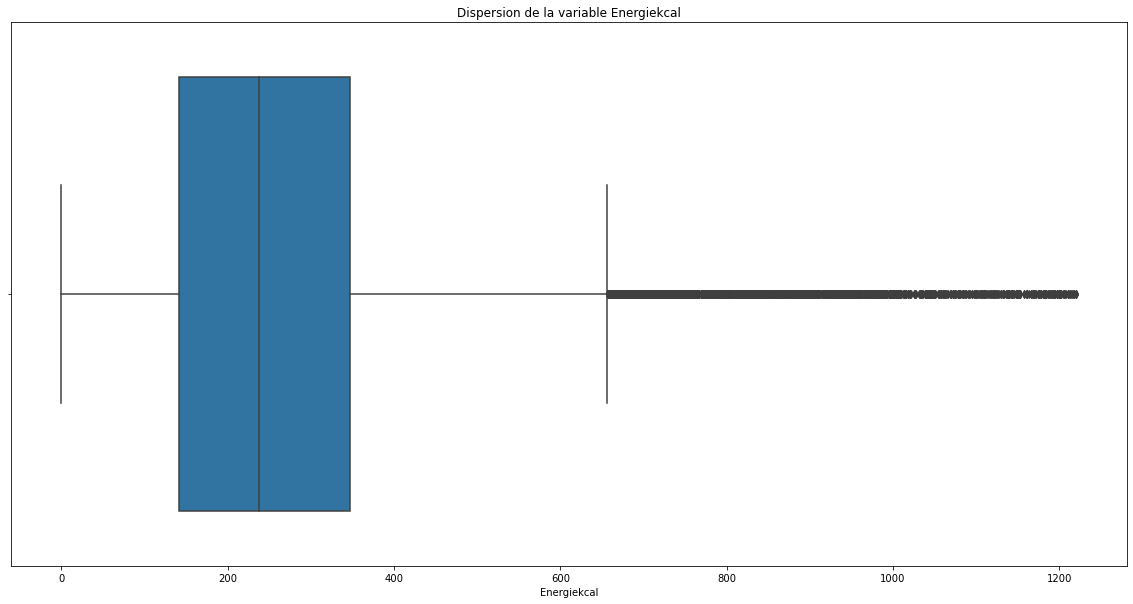

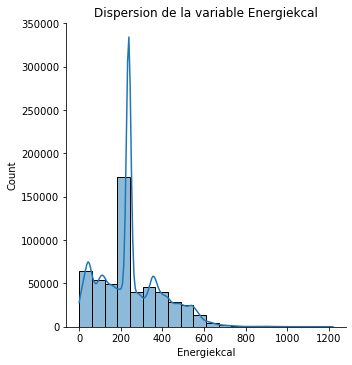

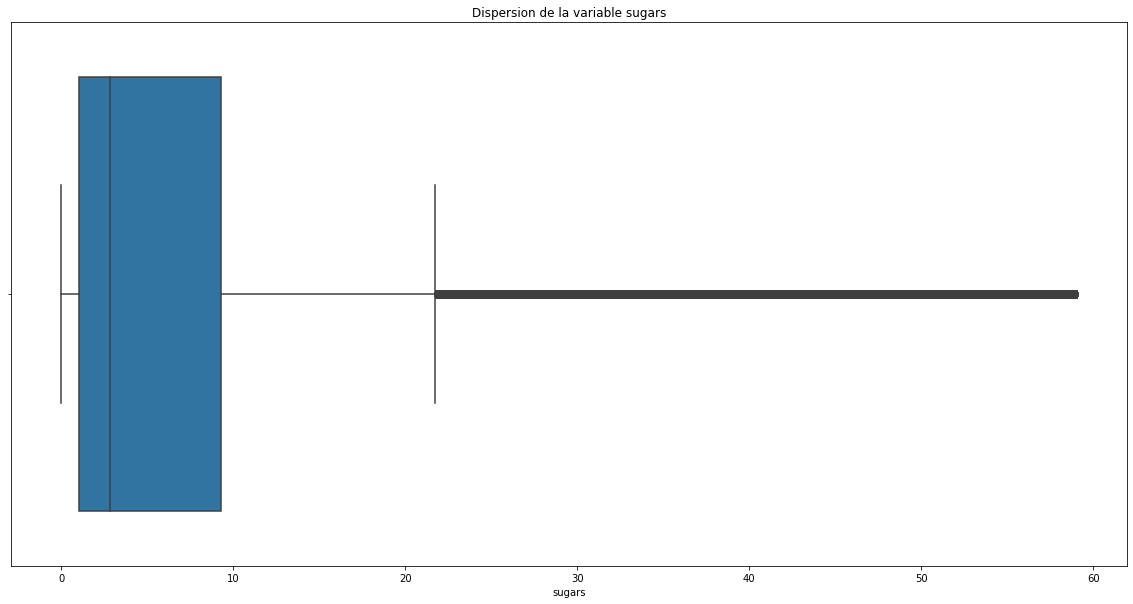

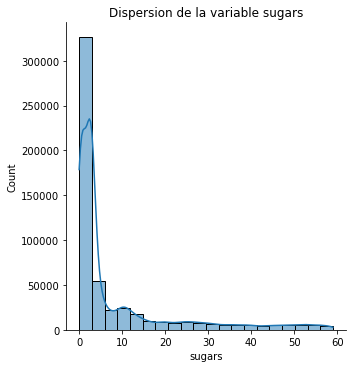

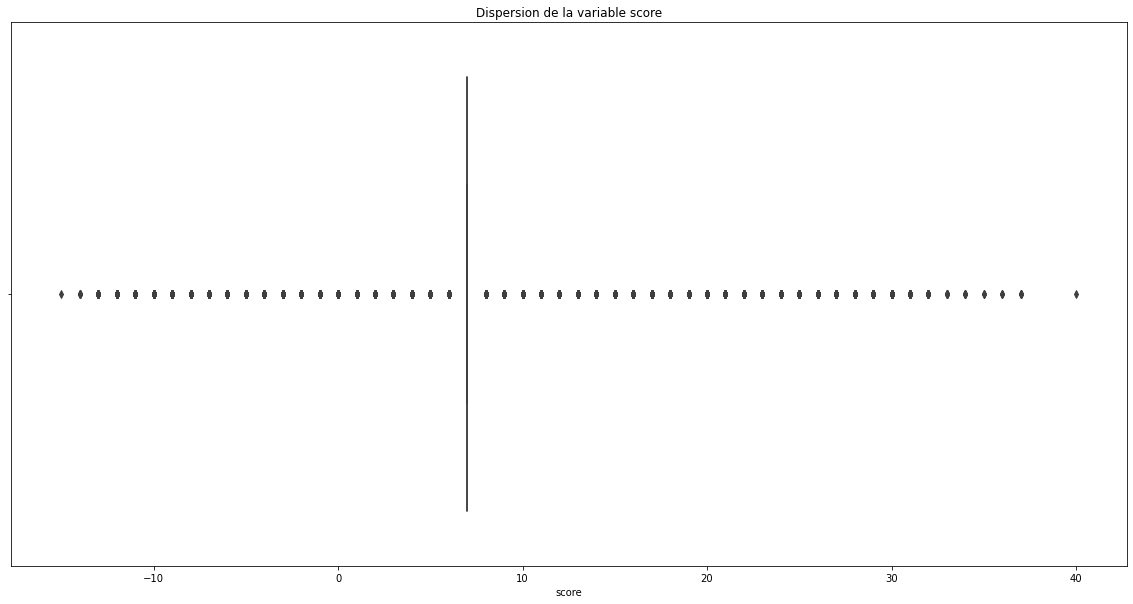

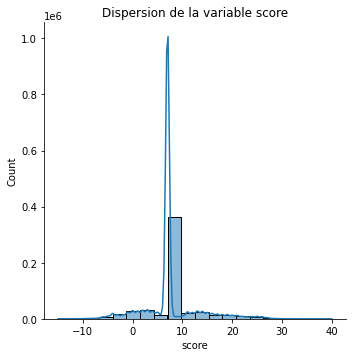

In [15]:
for col in data_pca.columns:
  TraceGraphique(data_pca,col)

In [7]:
data.nutriscore_grade.value_counts(dropna=False)

NaN    321214
d       67970
c       49146
e       41728
a       32464
b       29743
Name: nutriscore_grade, dtype: int64

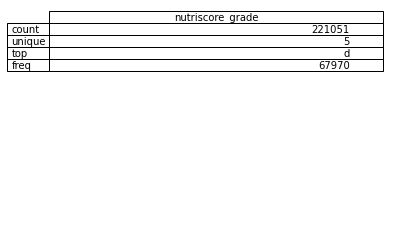

In [10]:
TableauModalite('nutriscore_grade')

In [15]:
data.select_dtypes('object').columns

Index(['code', 'creator', 'product_name', 'generic_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'purchase_places', 'stores',
       'countries_tags', 'ingredients_text', 'allergens', 'traces',
       'traces_tags', 'traces_en', 'serving_size', 'additives_tags',
       'additives_en', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'main_category',
       'main_category_en'],
      dtype='object')

## Variable Qualitative

Text(0.5, 1.0, 'Graphe des nutriscores grades')

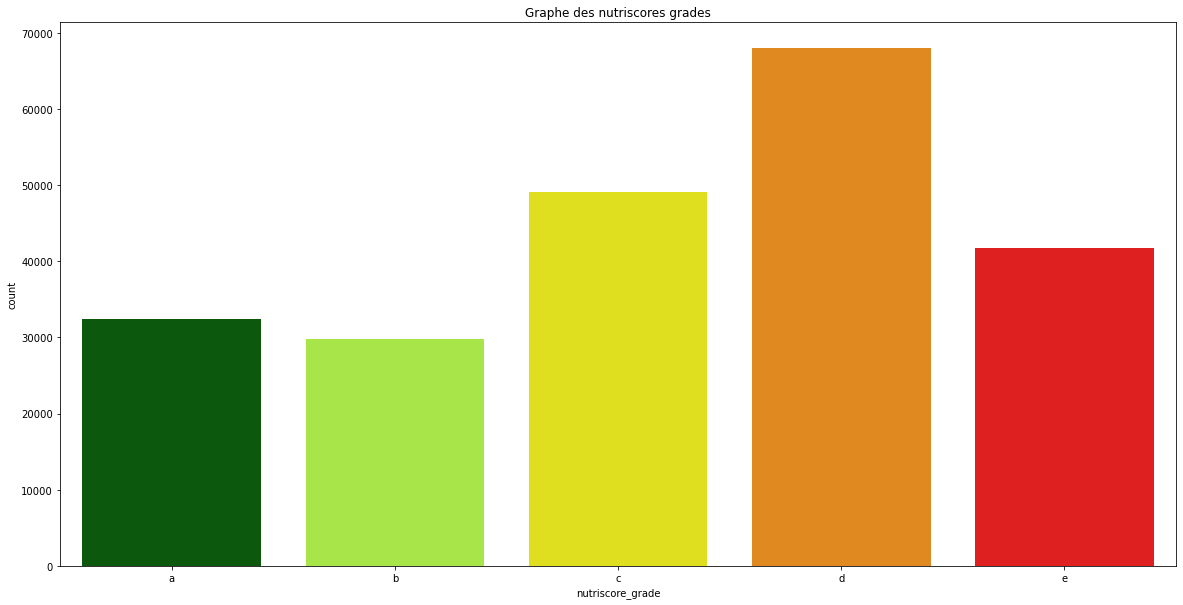

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x=data.nutriscore_grade.sort_values(ascending=True),palette=['darkgreen','greenyellow','yellow','darkorange','red'])
plt.title('Graphe des nutriscores grades')

#  Analyse multivarié Realisation de l'ACP

In [15]:
X = data_pca.values
#on convertit les données en array 

In [16]:
X.shape

(542265, 11)

In [17]:
features=data_pca.columns
#pour avoir le nom des colonnes 

In [18]:
#centrage et reduction des données grace a preprocessing
X_scaled=preprocessing.StandardScaler().fit_transform(X)
X_scaled[:,0]#additives
X_scaled[:,1]#nova group
X_scaled[:,2]#saturated 
X_scaled[:,3]#carbohydrates
X_scaled[:,4]#fiber
X_scaled[:,5]#proteins
X_scaled[:,6]#fat
X_scaled[:,7]#sodium
X_scaled[:,8]#energiekcal
X_scaled[:,9]#sugars
X_scaled[:,10]#nutrition score


array([-0.09968353,  2.01358414, -0.09968353, ..., -0.09968353,
        1.43723841, -1.82872071])

In [19]:
#verificattion si le centrage a bien marche 
#on verifie que la moyenne est égal à 0
#et l'ecart type egal à 1
np.mean(X_scaled,axis=0) #a peu pres egal a 0
np.mean(X_scaled)#moyenne

-3.866408174685026e-17

In [20]:
np.std(X_scaled)#egal a 1
np.std(X_scaled,axis=0)# egal à 1
#données centres et reduites 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
n_comp=6 #nombre de composantes maximum a calculer pour l'acp
#F1,2,3,4,5,6
#Calcul des composantes principales avec le nombre de composantes 
#egal a n_comp maximal
pca=decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)
#nous luis donnons les données centrés et réduites  
#nous lui donnons les données quantitatives en vue quil calcul les composantes 

PCA(n_components=6)

## Graphique Eboulis des valeurs propres

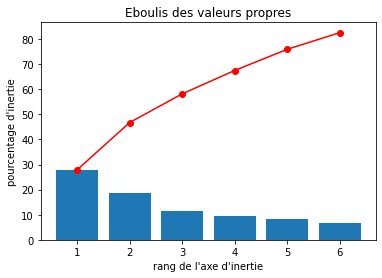

In [22]:
#graphique eboulis des valeurs propres
#pour la representation de nos individus 
display_scree_plot(pca)

In [ ]:
#on va prendre composante n=2 pour la représentation de nos individus 

## Cercle de corrélations

In [23]:
#affichage du cercle de correlations
pcs=pca.components_ #calcul des différents composantes
pcs[:,0]#F1
pcs[:,1]#F2
pcs[:,2]#F3
pcs[:,3]#F4
pcs[:,4]#F5
pcs[:,5]#F6

array([ 0.25414633, -0.38742848,  0.25872444,  0.01239184, -0.21175655,
        0.18981774])

In [24]:
pca.explained_variance_ratio_ 
#proportion de variance expliquée pour chaque axe factoriel 

array([0.27884092, 0.18843003, 0.11417963, 0.09314683, 0.08423525,
       0.06641252])

In [25]:
pca.explained_variance_
#valeurs propres variance expliquee

array([3.06725575, 2.07273418, 1.25597827, 1.02461699, 0.9265895 ,
       0.73053906])

## Graphique cercle de corrélation

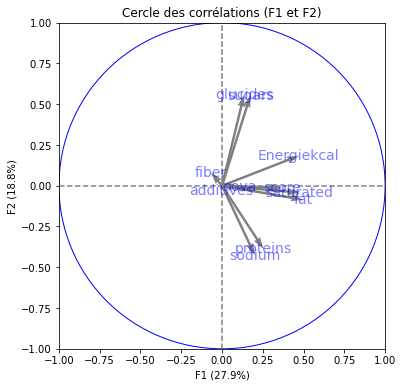

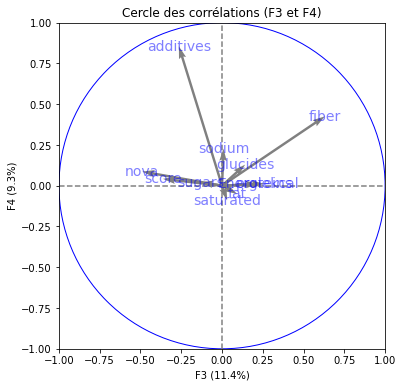

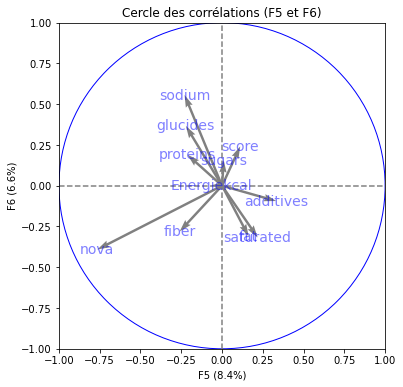

In [26]:
#utilisation de la fonction dsplay circles qui se trouve dans function
display_circles(pcs,n_comp,pca,[(0,1),(2,3),(4,5)],labels=np.array(features))
#pcs les differents composantes
#le nombre de composantes
#pca calcul des composantes principales
#[(0,1),(2,3),(4,5)] les plans factoriels F1, F2, f3,f4,f5,f6
# labels=np.array(features) le nom des colonnnes 
#d'aprés le graphe des eboulis des valeurs propres nous allons prendre le premier plan 
#factoriel qui donne 46.7% de l'information
#deuxieme plan 20.7%
#troisieme plan  15.5

#on va prendre le premier pl46.7% an factoriel pour représenter mes individus 

# Affichage individus avec nan de nutriscore 

In [27]:
names=data['nutriscore_grade']

In [ ]:
X_projected=pca.transform(X_scaled)

In [67]:
X_projected[:,0].shape

(542265,)

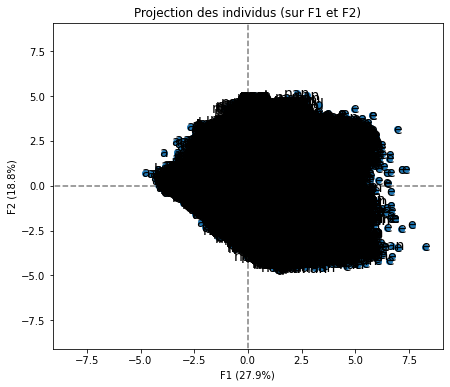

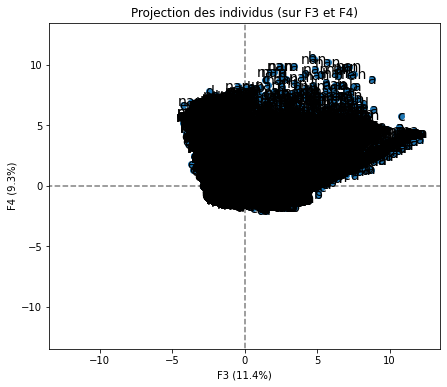

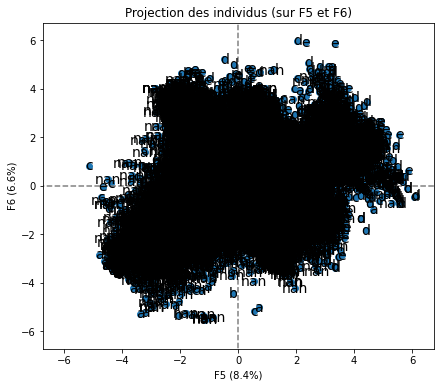

In [63]:
X_projected=pca.transform(X_scaled)
display_factorial_planes(X_projected,n_comp,pca,[(0,1),(2,3),(4,5)],labels=np.array(names))

# Affichage individus sans nan nutriscore

In [21]:
#on va afficher les individus en ne mettant les valeurs manquantes du nutriscore
#on ne veut pas remplacer les valeurs manquantes du nutriscore grade 
#car pour notre application on va sintéresser aux valeurs réelles 
i=data['nutriscore_grade'].isna()==True
sum(i)
#nous allons supprimer toutes les valeurs nan

321214

In [22]:
data[i].index
data2=data.drop(data[i].index)


In [23]:
data2.shape #221051 produits avec nutriscore grade sans les nan

(221051, 50)

In [24]:
#choix des variables 
data_pca2=data2[['additives_n','nova_group','saturated-fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','fat_100g','sodium_100g','Energiekcal','sugars_100g','nutritionscore100g']]

In [25]:
X2 = data_pca2.values
#on convertit les données en array cette methode ne nous permet davoir le nom des lignes 
#nous allons le creer


In [26]:
X_scaled2=preprocessing.StandardScaler().fit_transform(X2)

In [27]:
X_scaled2.mean()#centre

4.9723593986307004e-17

In [28]:
X_scaled2.std()#reduite 

1.0

In [34]:
features=data_pca2.columns
#le nom de mes variables
names2=data2['nutriscore_grade']
#le nom de mes individus 

In [39]:
X_projected2=pca.transform(X_scaled2) #coordonnées factorielles des individus
X_projected2[:,0]#F1
X_projected2[:,1]#f2
X_projected2[:,2]#f3
X_projected2[:,3]#F4
X_projected2[:,4]#f5
X_projected2[:,5]#f6
#dapres le graphe des eboulis nous allons utiliser le plan factoriel
#nouvelles variables qui son combinaison linéaires de mes anciennes variables 

array([ 3.16921333, -0.5246061 , -1.75042369, ...,  0.57021825,
        0.21848991, -0.6119236 ])

In [213]:
# Transformation en DataFrame pandas 
#pour le  premier plan factoriel 
#choix grace a la methode du coude 
pca_df = pd.DataFrame({
    "Dim1" : X_projected2[:,0], 
    "Dim2" : X_projected2[:,1], 
    "Nutriscore" : data2.nutriscore_grade
})


C:\Users\soule\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 1440x720 with 0 Axes>

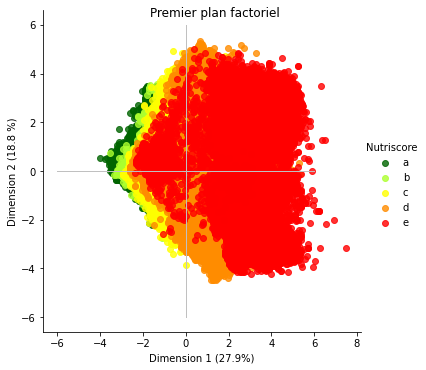

In [214]:
plt.figure(figsize=(20,10))
g_pca = sns.lmplot("Dim1", "Dim2", hue = "Nutriscore", data = pca_df.sort_values(['Nutriscore']), fit_reg = False,palette=['darkgreen','greenyellow','yellow','darkorange','red'] )
g_pca.set(xlabel = "Dimension 1 (27.9%)", ylabel = "Dimension 2 (18.8 %)")
g_pca.fig.suptitle("Premier plan factoriel")
plt.plot([-6,6],[0,0],color='silver',linestyle='solid',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='solid',linewidth=1)
plt.show()

C:\Users\soule\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


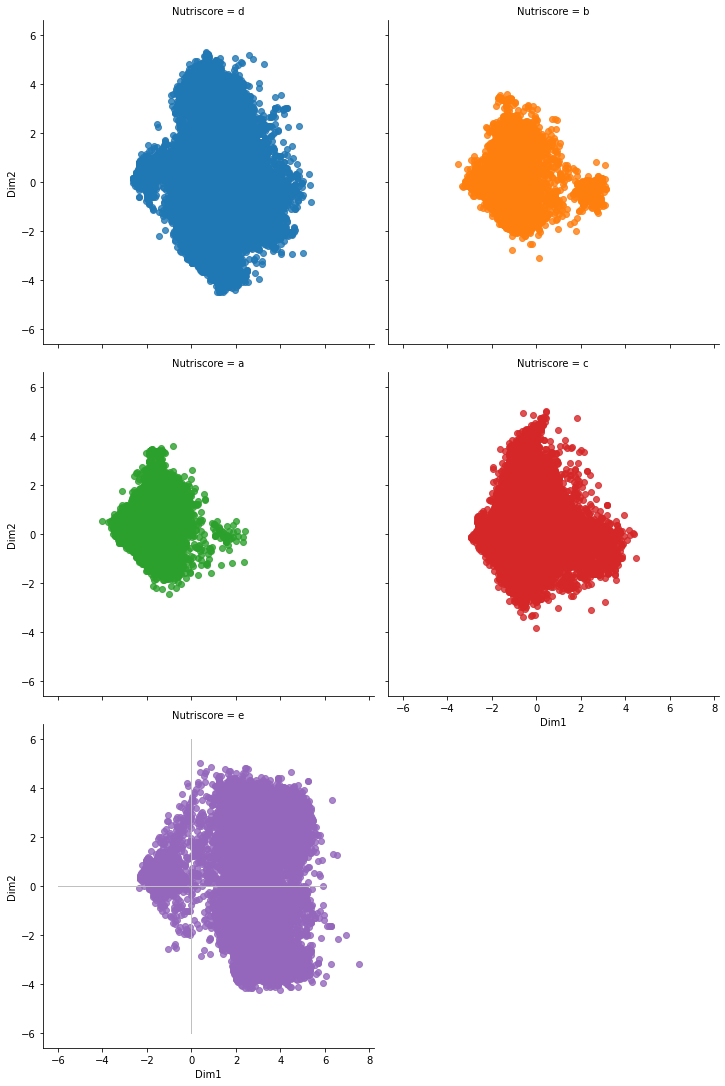

In [66]:
g_pca2 = sns.lmplot("Dim1", "Dim2", hue = "Nutriscore", col = "Nutriscore", col_wrap = 2, data = pca_df, fit_reg = False)
plt.plot([-6,6],[0,0],color='silver',linestyle='solid',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='solid',linewidth=1)
plt.show()
g_pca2.set(xlabel = "Dimension 1 (27.9%)", ylabel = "Dimension 2 (18.8 %)")



# Contribution des variables

In [43]:
pca.components_
#6 lignes et 11 colonnes 
#6 composantes pour les 11 variables
#vecteurs propres

array([[-0.00522778,  0.10844944,  0.47426884,  0.13478623, -0.06816557,
         0.25414633,  0.496386  ,  0.20159376,  0.47143728,  0.17403491,
         0.3691827 ],
       [-0.02914141, -0.00664413, -0.04273054,  0.55732049,  0.08122067,
        -0.38742848, -0.08586138, -0.42629575,  0.18381493,  0.55400345,
        -0.01300003],
       [-0.26453959, -0.48911153,  0.03133139,  0.14160673,  0.63003669,
         0.25872444,  0.09175042,  0.00906812,  0.22098733, -0.13187666,
        -0.36213644],
       [ 0.8547189 ,  0.08688153, -0.08849237,  0.12926234,  0.42502694,
         0.01239184, -0.04974746,  0.22759385,  0.01106417,  0.0202268 ,
         0.0419616 ],
       [ 0.33181168, -0.76467477,  0.21811501, -0.22168672, -0.25968721,
        -0.21175655,  0.16320769, -0.22970158, -0.06484841,  0.01078404,
         0.11160145],
       [-0.09373285, -0.39115221, -0.3171119 ,  0.36701287, -0.280323  ,
         0.18981774, -0.31039535,  0.5564885 ,  0.00279654,  0.15538402,
         0.241

In [44]:
n=data.shape[0]
p=data_pca.shape[1]
eigval=(n-1)/n*pca.explained_variance_#valeurs propres
#racine carre valeur propre
sqrt_eigval=np.sqrt(eigval)
corvar=np.zeros((p,p))
for k in range(6):
  corvar[:,k]=pca.components_[k,:]*sqrt_eigval[k]
print(corvar) #affichage matrice de correlation
#les variables sont en ligne et les facteurs en colonnes 
#matice des corrélation

[[-0.00915571 -0.04195483 -0.2964704   0.86517445  0.31940003 -0.08011487
   0.          0.          0.          0.          0.        ]
 [ 0.18993364 -0.00956555 -0.54814893  0.08794433 -0.73607158 -0.33432365
   0.          0.          0.          0.          0.        ]
 [ 0.83061388 -0.06151907  0.0351132  -0.08957487  0.20995627 -0.27104029
   0.          0.          0.          0.          0.        ]
 [ 0.23605876  0.8023732   0.15869913  0.13084357 -0.21339438  0.3136914
   0.          0.          0.          0.          0.        ]
 [-0.11938222  0.11693323  0.70608422  0.43022618 -0.24997343 -0.23959627
   0.          0.          0.          0.          0.        ]
 [ 0.44510086 -0.55778     0.28995334  0.01254343 -0.20383564  0.16224007
   0.          0.          0.          0.          0.        ]
 [ 0.86934892 -0.12361445  0.10282501 -0.05035601  0.15710279 -0.26529956
   0.          0.          0.          0.          0.        ]
 [ 0.35306257 -0.61373714  0.01016267  0.2

In [46]:
df=pd.DataFrame({'id':data_pca.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})
df #matrice de corrélation pour les deux premiers plans 

,id,COR_1,COR_2
0,additives,-0.009156,-0.041955
1,nova,0.189934,-0.009566
2,saturated,0.830614,-0.061519
3,glucides,0.236059,0.802373
4,fiber,-0.119382,0.116933
5,proteins,0.445101,-0.557780
6,fat,0.869349,-0.123614
7,sodium,0.353063,-0.613737
8,Energiekcal,0.825655,0.264638
9,sugars,0.304797,0.797598


# Qualite de représentation des variables

In [47]:
#la qualite de representation des variables est calcule par le cos au carre
#la correlation au carre 
cos2var=corvar**2
df=pd.DataFrame({'id':data_pca.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]})
df

,id,COS2_1,COS2_2
0,additives,0.000084,0.001760
1,nova,0.036075,0.000091
2,saturated,0.689919,0.003785
3,glucides,0.055724,0.643803
4,fiber,0.014252,0.013673
5,proteins,0.198115,0.311119
6,fat,0.755768,0.015281
7,sodium,0.124653,0.376673
8,Energiekcal,0.681706,0.070033
9,sugars,0.092901,0.636162


# Relation Qualitative et Qualitative

##  entre le nutriscore grade et les marques 

In [28]:
data.nutriscore_grade.isna().sum() #321214 le nombre de valeurs manquantes
data.brands.isna().sum()#223026 le nombre de valeurs manquantes 

223026

In [29]:
data.nutriscore_grade.isna().sum()
#data.brands.isna().sum()

321214

In [30]:
#quali vs quali
t=pd.pivot_table(data[['nutriscore_grade','brands']],index='nutriscore_grade',columns='brands',aggfunc=len,dropna=False,margins=True,margins_name='Total')

#test chi deux 
#from scipy.stats import chi2_contingency
#st_chi2, st_p, st_dof, st_exp = chi2_contingency(t)
# test chi deux
 #Statistique khi2, calculée à la main dans la première partie
#st_chi2 = 21.99
 
# Nombe de degrés de liberté
#st_dof = 6
 
# Pvalue : l'unique valeur nécessaire pour prendre notre décision
#st_p = 0.00121

In [31]:
d=t.dropna()
d#suppression des nan

brands,le verger des fruits,&quot;Tradition Culinaire&quot;,( Grand Frais ),(sans marque),+Lanzarote,+carré suisse,-,-desantis,...,0%Sauce,...,"€co+,Eco+","€co,Eco","伍中,Wu Chung",微记,日本口,"李錦記,Lee Kum Kee","谷优,Gullon Biscuits,Gullon","데미 소다,DemiSoda",송학,Total
nutriscore_grade,,,,,,,,,,,,,,,,,,,,,
Total,1.0,1.0,1.0,21.0,1.0,1.0,6.0,1.0,1.0,1.0,...,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,542265


In [32]:
from scipy.stats import chi2_contingency
st_chi2, st_p, st_dof, st_exp = chi2_contingency(d)

In [59]:
st_p 
# H0 independance de la marque et nutriscore 
#H1 dependance entre la marque et le nutriscore
#pvalue > 0.05 on accepte H0
# veut dire la connaissance de la marque  n'a aucune incidence sur la connaissance du nutriscore 


1.0

## Entre le nutriscore grade et les catégories de produits 

In [37]:
data.categories #la categorie des produits 

0                                                       NaN
1                   Epicerie, Condiments, Sauces, Moutardes
2                                                       Xsf
3                                                       NaN
4                                                       NaN
                                ...                        
542260    Aliments et boissons à base de végétaux, Alime...
542261    Viandes, Bœuf, Steaks, Steaks de bœuf, Steaks ...
542262                                                  NaN
542263               Snacks, Snacks sucrés, Beignets sucrés
542264    Viandes, Bœuf, Steaks, Steaks de bœuf, Steaks ...
Name: categories, Length: 542265, dtype: object

In [39]:
#quali vs quali
C=pd.pivot_table(data[['nutriscore_grade','categories']],index='nutriscore_grade',columns='categories',aggfunc=len,dropna=False,margins=True,margins_name='Total')

#test chi deux 
#from scipy.stats import chi2_contingency
#st_chi2, st_p, st_dof, st_exp = chi2_contingency(t)
# test chi deux
 #Statistique khi2, calculée à la main dans la première partie
#st_chi2 = 21.99
 
# Nombe de degrés de liberté
#st_dof = 6
 
# Pvalue : l'unique valeur nécessaire pour prendre notre décision
#st_p = 0.00121

In [43]:
e=C.dropna() #on enléve tous les nan 

In [44]:
from scipy.stats import chi2_contingency
st_chi2, st_p, st_dof, st_exp = chi2_contingency(e)

In [45]:
st_p 
# H0 independance de la categorie des produits  et nutriscore 
#H1 dependance entre la categorie des produits  et le nutriscore
#pvalue > 0.05 on accepte H0
# veut dire la connaissance de la marque  n'a aucune incidence sur la connaissance du nutriscore 


1.0

## Entre le nutriscore grade et les additives 

In [174]:
t=pd.pivot_table(data[['nutriscore_grade','additives_en']],index='nutriscore_grade',columns='additives_en',aggfunc=len,margins=True,margins_name='Total')

In [250]:
data.additives_en.unique()

array([nan,
       'E150 - Caramel,E160a - Carotene,E202 - Potassium sorbate,E316 - Sodium erythorbate,E466 - Sodium carboxy methyl cellulose',
       'E300 - Ascorbic acid,E503 - Ammonium carbonates', ...,
       'E1200 - Polydextrose,E322 - Lecithins,E322i - Lecithin,E330 - Citric acid,E407 - Carrageenan,E412 - Guar gum,E415 - Xanthan gum,E440 - Pectins',
       'E1200 - Polydextrose,E300 - Ascorbic acid,E412 - Guar gum,E415 - Xanthan gum,E440 - Pectins',
       "E150a - Plain caramel,E635 - Disodium 5'-ribonucleotide"],
      dtype=object)

In [175]:
d1=t.dropna()#pour enlever les nan

In [176]:
from scipy.stats import chi2_contingency
st_chi2, st_p, st_dof, st_exp = chi2_contingency(d1)
st_p
## H0 independance de le nombre d'additives et nutriscore la connaissance de l'un 
#n'a aucune influence sur la connaissance de l'autre
#H1 dependance entre les additives  et le nutriscore
#pvalue > 0.05 on accepte H0
# veut dire la connaissance de la marque  n'a aucune incidence sur la connaissance du nutriscore 



1.0

# Quantitative et qualitative 

## avec nutriscore grade et sucre 

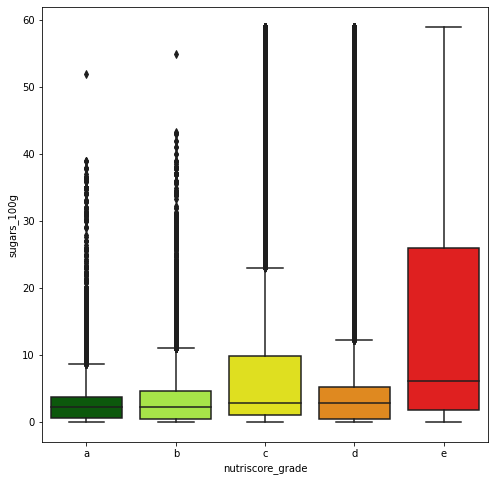

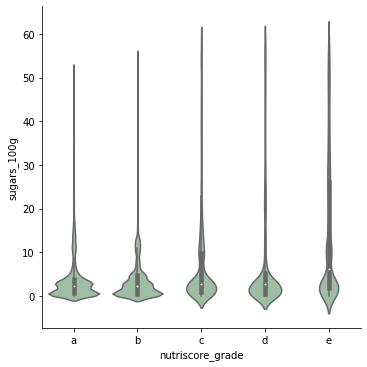

In [177]:
#on veut savoir si une variable qualitative va influencer 
#sur une variable quantitative sugars_100g
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='nutriscore_grade', y='sugars_100g', data=data.sort_values(['nutriscore_grade']), palette=['darkgreen','greenyellow','yellow','darkorange','red'])
ax=sns.catplot(x='nutriscore_grade', y='sugars_100g',kind='violin', data=data.sort_values(['nutriscore_grade']), color='#99c2a2')
plt.show()

## Nutriscore et Energiekcal

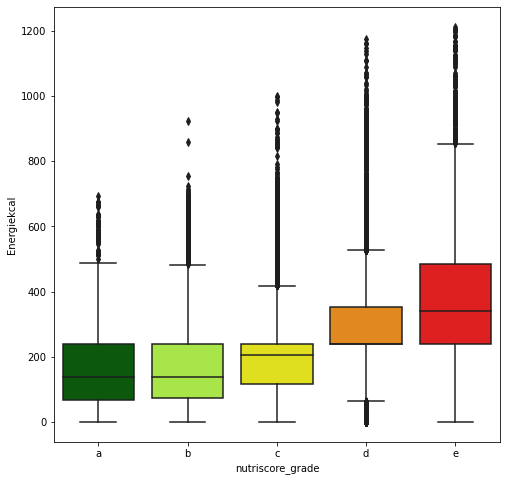

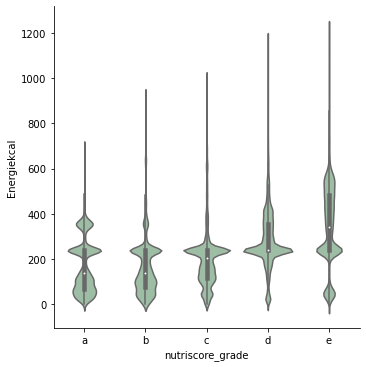

In [178]:
#pour 'Energiekcal'
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='nutriscore_grade', y='Energiekcal', data=data.sort_values(['nutriscore_grade']), palette=['darkgreen','greenyellow','yellow','darkorange','red'])
ax=sns.catplot(x='nutriscore_grade', y='Energiekcal',kind='violin', data=data.sort_values(['nutriscore_grade']), color='#99c2a2')
plt.show()

## Nutriscore grade et graisse

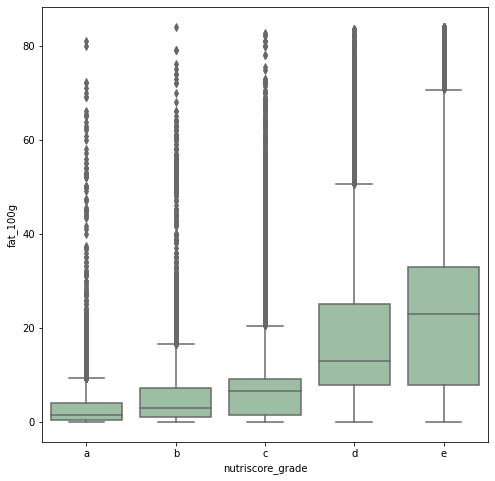

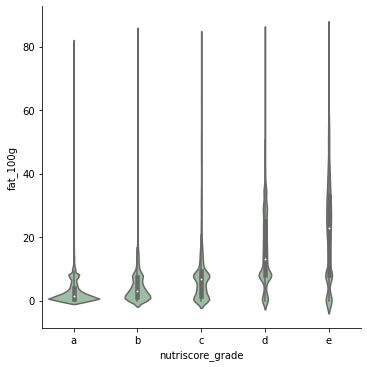

In [220]:
#fat_100g
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='nutriscore_grade', y='fat_100g', data=data.sort_values(['nutriscore_grade']), color='#99c2a2')
ax=sns.catplot(x='nutriscore_grade', y='fat_100g',kind='violin', data=data.sort_values(['nutriscore_grade']), color='#99c2a2')
#ax = sns.swarmplot(x="nutriscore_grade", y="sugars_100g", data=dataPropre1, color='#7d0013')
plt.show()

## Nutriscore et proteins

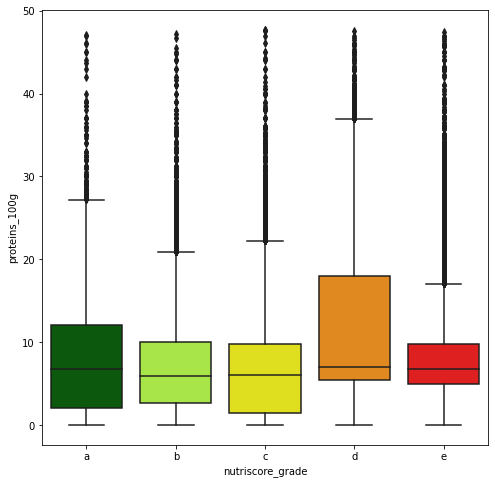

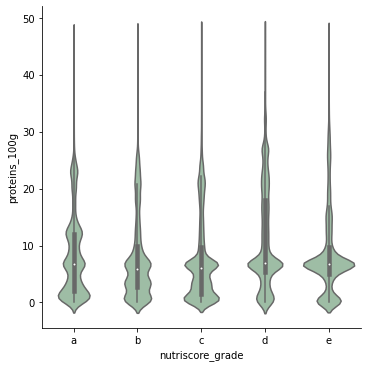

In [179]:
#'proteins_100g'
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='nutriscore_grade', y='proteins_100g', data=data.sort_values(['nutriscore_grade']),palette=['darkgreen','greenyellow','yellow','darkorange','red'])
ax=sns.catplot(x='nutriscore_grade', y='proteins_100g',kind='violin', data=data.sort_values(['nutriscore_grade']), color='#99c2a2')
#ax = sns.swarmplot(x="nutriscore_grade", y="sugars_100g", data=dataPropre1, color='#7d0013')
plt.show()

## Nutriscore et sodium

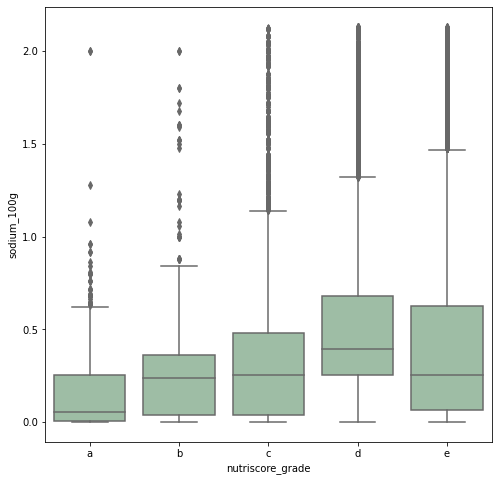

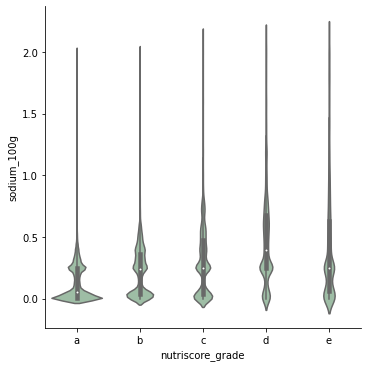

In [222]:
#sodium_100g
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='nutriscore_grade', y='sodium_100g', data=data.sort_values(['nutriscore_grade']), color='#99c2a2')
ax=sns.catplot(x='nutriscore_grade', y='sodium_100g',kind='violin', data=data.sort_values(['nutriscore_grade']), color='#99c2a2')
#ax = sns.swarmplot(x="nutriscore_grade", y="sugars_100g", data=dataPropre1, color='#7d0013')
plt.show()

## Nutriscore et nutritionscore100g

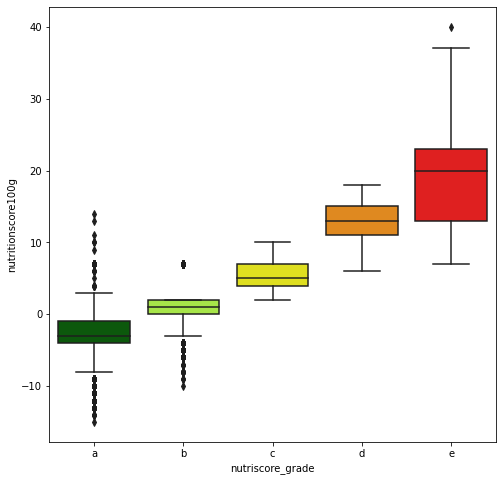

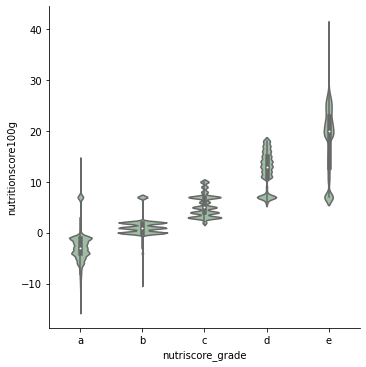

In [180]:
#nutrition-score100g
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='nutriscore_grade', y='nutritionscore100g', data=data.sort_values(['nutriscore_grade']),palette=['darkgreen','greenyellow','yellow','darkorange','red'] )
ax=sns.catplot(x='nutriscore_grade', y='nutritionscore100g',kind='violin', data=data.sort_values(['nutriscore_grade']), color='#99c2a2')
#ax = sns.swarmplot(x="nutriscore_grade", y="sugars_100g", data=dataPropre1, color='#7d0013')
plt.show()

## Nutriscore et graisses satures

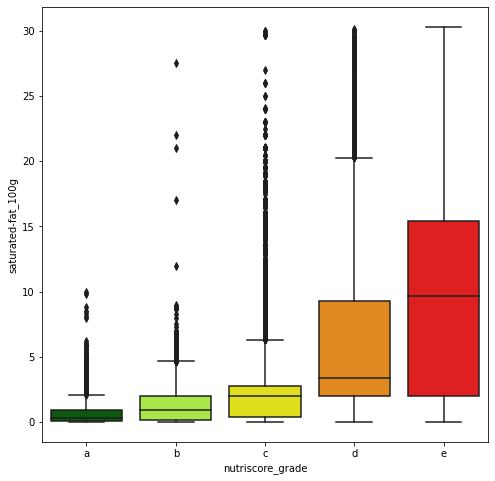

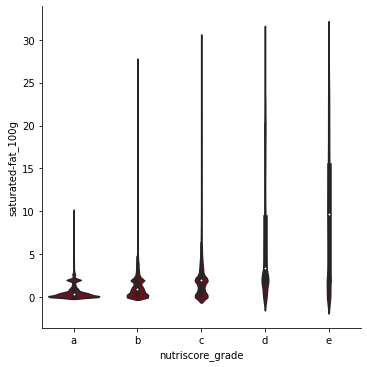

In [181]:
#saturatedfat
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='nutriscore_grade', y='saturated-fat_100g', data=data.sort_values(['nutriscore_grade']), palette=['darkgreen','greenyellow','yellow','darkorange','red'])
ax=sns.catplot(x='nutriscore_grade', y='saturated-fat_100g',kind='violin',data=data.sort_values(['nutriscore_grade']), color='#7d0013')
plt.show()

## Nutriscore et Carbohydrates 

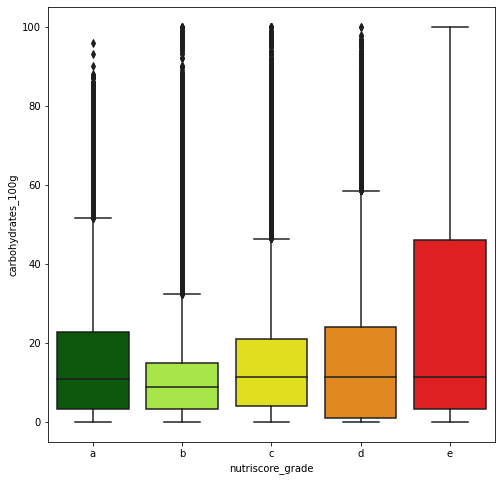

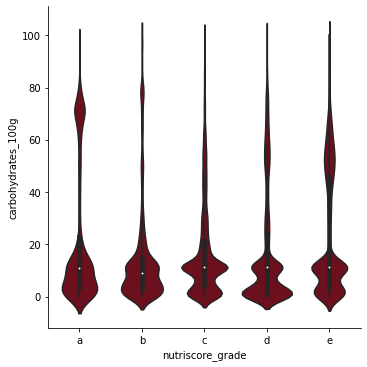

In [182]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='nutriscore_grade', y='carbohydrates_100g', data=data.sort_values(['nutriscore_grade']),  palette=['darkgreen','greenyellow','yellow','darkorange','red'])
ax=sns.catplot(x='nutriscore_grade', y='carbohydrates_100g',kind='violin',data=data.sort_values(['nutriscore_grade']),color='#7d0013')
plt.show()

## Nutriscore et fiber

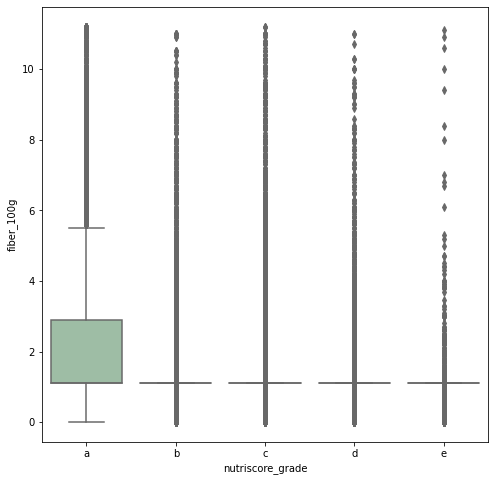

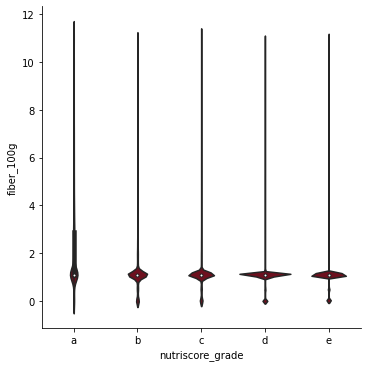

In [233]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x='nutriscore_grade', y='fiber_100g', data=data.sort_values(['nutriscore_grade']), color='#99c2a2')
ax=sns.catplot(x='nutriscore_grade', y='fiber_100g',kind='violin',data=data.sort_values(['nutriscore_grade']),color='#7d0013')
plt.show()

## ANOVA

### Proteins et nutriscore grade

In [268]:
#nous n'allons pas faire l'anova sur toutes les variables 
#en regardant sur le cercle de corrélation nous pouvons tester pour les variables
#proteines, sodium energykcal et carbohydrates 
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('proteins_100g ~ C(nutriscore_grade)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table
anova_table()
#on pose H0 moyenne de proteins egal pour chaque groupe de nutiscore
#H1 moyenne de proteins nest pas egal pour chaque groupe moyenne differentes
#nous concluons quil existe des différences significatives de moyenne
#car p< 5% on rejette h0
#etasquared = 0.038 


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(nutriscore_grade),5.306643e+05,4.0,132666.080550,2223.065537,0.0,0.038672,0.038655
Residual,1.319138e+07,221046.0,59.677089,NaN,NaN,NaN,NaN


In [198]:
data.select_dtypes('float').columns

Index(['additives_n', 'nova_group', 'Energiekcal', 'fat_100g',
       'saturatedfat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutritionscore100g'],
      dtype='object')

### Nutritionscore et nutriscore grade 

In [199]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('nutritionscore100g ~ C(nutriscore_grade)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table
anova_table()
#on pose H0 moyenne de nutriscore egal pour chaque groupe de nutiscore
#H1 moyenne de nutritionscore nest pas egal pour chaque groupe moyenne differentes
#nous concluons quil existe des différences significatives de moyenne
#car p< 5% on rejette h0
#etasquared=0.77 pas de relation si il etait egal a 1 relation

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(nutriscore_grade),1.118423e+07,4.0,2.796057e+06,187525.342894,0.0,0.772387,0.772382
Residual,3.295860e+06,221046.0,1.491029e+01,NaN,NaN,NaN,NaN


In [194]:
data=data.rename(columns={'saturated-fat_100g':'saturatedfat_100g'})

### Saturated fat et nutriscore grade

In [195]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('saturatedfat_100g ~ C(nutriscore_grade)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table
anova_table()
#on pose H0 moyenne de saturated egal pour chaque groupe de nutiscore
#H1 moyenne de saturated nest pas egal pour chaque groupe moyenne differentes
#nous concluons quil existe des différences significatives de moyenne
#car p< 5% on rejette h0
#etasquared=0.28 pas de relation si il etait egal a 1 relation

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(nutriscore_grade),2.520085e+06,4.0,630021.288971,21614.349372,0.0,0.281159,0.281145
Residual,6.443113e+06,221046.0,29.148288,NaN,NaN,NaN,NaN


### Energie et nutriscore grade

In [270]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Energiekcal ~ C(nutriscore_grade)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table
anova_table()
#on pose H0 moyenne denergie egal pour chaque groupe de nutiscore
#H1 moyenne denergie nest pas egal pour chaque groupe moyenne differentes
#nous concluons quil existe des différences significatives de moyenne
#car p< 5% on rejette h0
#etasquared=0.20 pas de relation si il etait egal a 1 relation

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(nutriscore_grade),9.929482e+08,4.0,2.482371e+08,14423.018207,0.0,0.206976,0.206961
Residual,3.804461e+09,221046.0,1.721117e+04,NaN,NaN,NaN,NaN


### Carbohydrates et nutriscoregrade

In [271]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('carbohydrates_100g ~ C(nutriscore_grade)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table
anova_table()
#on pose H0 moyenne de glucides egal pour chaque groupe de nutiscore
#H1 moyenne de glucides nest pas egal pour chaque groupe moyenne differentes
#nous concluons quil existe des différences significatives de moyenne
#car p< 5% on rejette h0
#etasquared=0.01 pas de relation si il etait egal a 1 relation

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(nutriscore_grade),1.697767e+06,4.0,424441.788053,920.11009,0.0,0.016377,0.01636
Residual,1.019673e+08,221046.0,461.294570,NaN,NaN,NaN,NaN


## KRUSKAL WALLIS

In [ ]:

#l'anova utilise la moyenne le kruskal wallis utilise la médiane
#on pose Ho la mediane dune variable quantitative est égale dans toutes les modalites
#de la variable qualitative
#on pose H1 l'hypothese alternative
#pvalue > 0.05 on accepte Ho
#pvalue < 0.05 on rejette h0 la mediane pour chaque modalite est differente 

### Nutriscore grade et nutritionscore100g

In [200]:
from pingouin import kruskal
kruskal(data=data,dv='nutritionscore100g',between='nutriscore_grade')

,Source,ddof1,H,p-unc
Kruskal,nutriscore_grade,4,179217.541367,0.0


### Nutriscore grade et carbohydrates 

In [79]:
kruskal(data=data,dv='carbohydrates_100g',between='nutriscore_grade')

,Source,ddof1,H,p-unc
Kruskal,nutriscore_grade,4,2601.48344,0.0


### Nutriscore grade et energiekcal

In [80]:
kruskal(data=data,dv='Energiekcal',between='nutriscore_grade')

,Source,ddof1,H,p-unc
Kruskal,nutriscore_grade,4,45494.664998,0.0


# Quantitatives et Quantitatives 

## Matrice de corrélation

<AxesSubplot:>

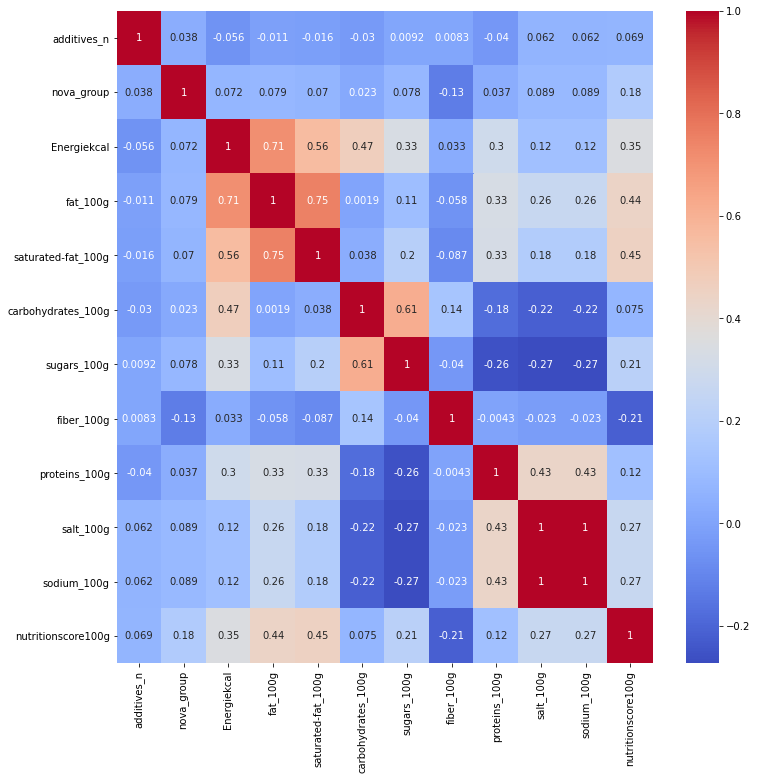

In [234]:
cor=data.corr()
fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(cor,annot=True,ax=ax,cmap='coolwarm')
#si le coefficient de coreelation est superieur a 0.85
#on conclue que les deux variables donnent à peu prés la meme information 

## Relation entre (sodium et salt),(fat,saturated) et (fat,energykcal)

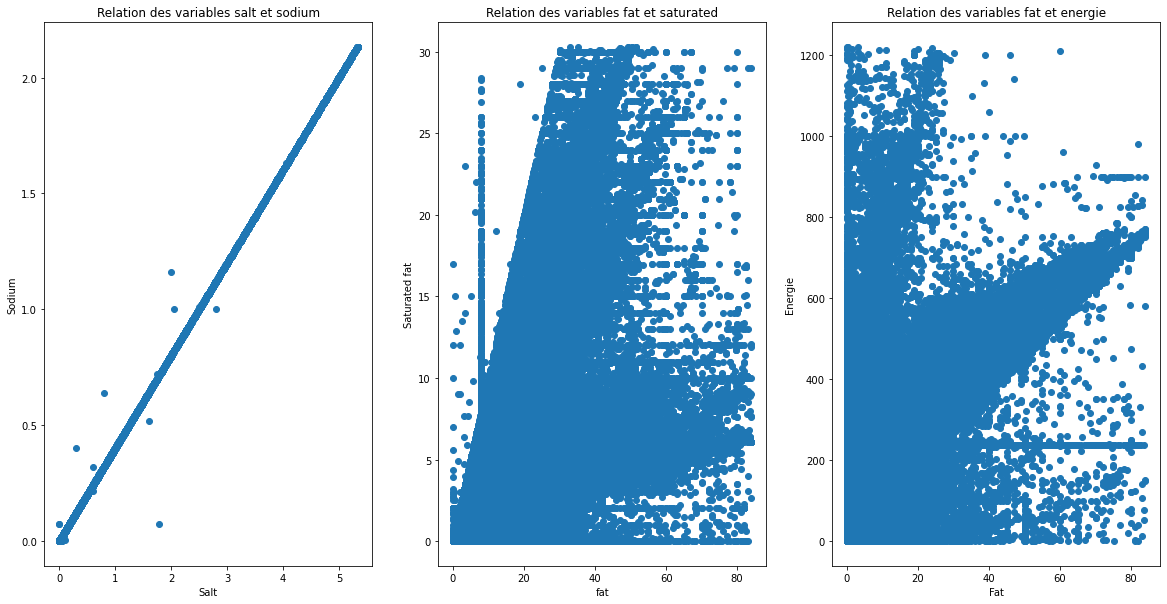

In [252]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.scatter(x=data['salt_100g'],y=data['sodium_100g'],label=['salt','sodium']);
plt.xlabel('Salt')
plt.ylabel('Sodium')
plt.title('Relation des variables salt et sodium')

plt.subplot(1,3,2)
plt.scatter(x=data['fat_100g'],y=data['saturated-fat_100g'],label=['fat','saturated']);
plt.xlabel('fat')
plt.ylabel('Saturated fat')
plt.title('Relation des variables fat et saturated')

plt.subplot(1,3,3)
plt.scatter(x=data['fat_100g'],y=data['Energiekcal'],label=['fat','Energie']);
plt.xlabel('Fat')
plt.ylabel('Energie')
plt.title('Relation des variables fat et energie')
plt.show()


## Relation de deux variables quantitatives en fonction du nutriscore grade 

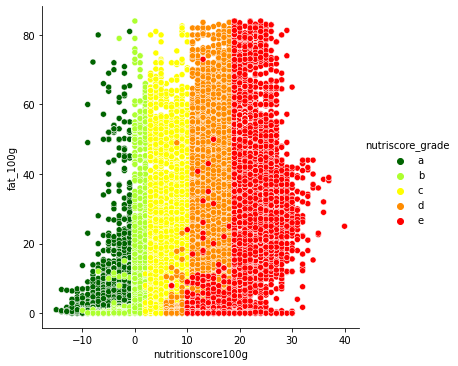

In [258]:
sns.relplot(x='nutritionscore100g',y='fat_100g',hue='nutriscore_grade',data=data.sort_values(['nutriscore_grade']),palette=['darkgreen','greenyellow','yellow','darkorange','red'])

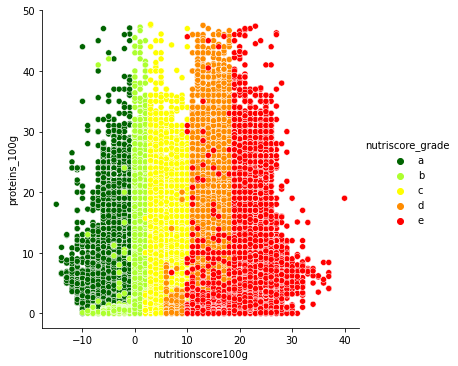

In [263]:
sns.relplot(x='nutritionscore100g',y='proteins_100g',hue='nutriscore_grade',data=data.sort_values(['nutriscore_grade']),palette=['darkgreen','greenyellow','yellow','darkorange','red'])

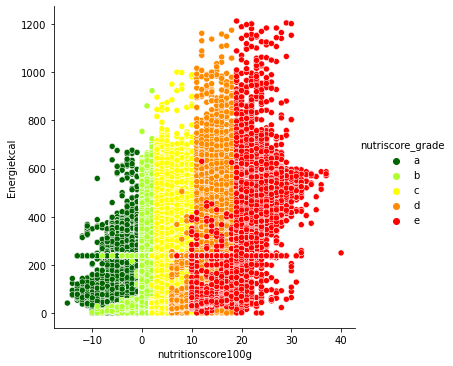

In [264]:
sns.relplot(x='nutritionscore100g',y='Energiekcal',hue='nutriscore_grade',data=data.sort_values(['nutriscore_grade']),palette=['darkgreen','greenyellow','yellow','darkorange','red'])

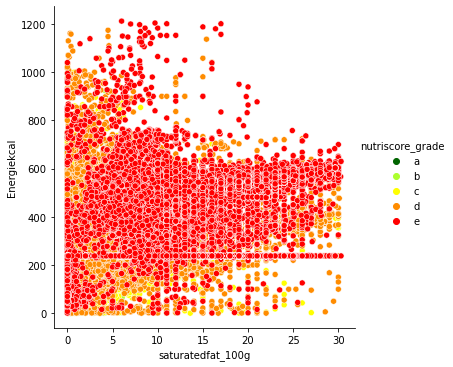

In [202]:
sns.relplot(x='saturatedfat_100g',y='Energiekcal',hue='nutriscore_grade',data=data.sort_values(['nutriscore_grade']),palette=['darkgreen','greenyellow','yellow','darkorange','red'])

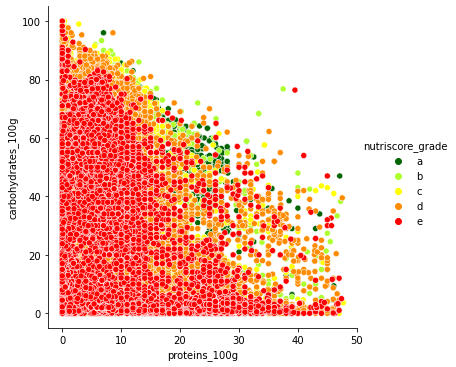

In [203]:
sns.relplot(x='proteins_100g',y='carbohydrates_100g',hue='nutriscore_grade',data=data.sort_values(['nutriscore_grade']),palette=['darkgreen','greenyellow','yellow','darkorange','red'])